<a href="https://colab.research.google.com/github/RKNahid/MS-PMIT-/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Use to import pandas
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DM/Dataset_For_Assignment_1.csv')
data.head(10)

,id,refund,gender,marital status,income,cheat
0,1,No,M,Single,1200,Yes
1,2,Yes,F,Single,200,Yes
2,3,Yes,F,Married,1700,Yes
3,4,No,M,Single,1200,No
4,5,Yes,M,Divorced,1800,Yes
5,6,No,M,Single,1500,No
6,7,No,M,Married,500,No
7,8,No,F,Married,1800,Yes
8,9,No,F,Single,1300,No
9,10,No,M,Divorced,1900,No


In [3]:
#convert gender text value to neumarical value
data['gender'] = data['gender'].map({'M': 1, 'F': 0})
data.head()

,id,refund,gender,marital status,income,cheat
0,1,No,1,Single,1200,Yes
1,2,Yes,0,Single,200,Yes
2,3,Yes,0,Married,1700,Yes
3,4,No,1,Single,1200,No
4,5,Yes,1,Divorced,1800,Yes


In [4]:
#convert refund boolean value to neumarical value
data['refund'] = data['refund'].map({'Yes': 1, 'No': 0})
data.head()

,id,refund,gender,marital status,income,cheat
0,1,0,1,Single,1200,Yes
1,2,1,0,Single,200,Yes
2,3,1,0,Married,1700,Yes
3,4,0,1,Single,1200,No
4,5,1,1,Divorced,1800,Yes


In [5]:
#convert marital status as binary and duplicate into 'mar'
data['mar'] = data.loc[:, 'marital status']
data = pd.get_dummies(data, columns=['mar'])
data.head()

,id,refund,gender,marital status,income,cheat,mar_Divorced,mar_Married,mar_Single
0,1,0,1,Single,1200,Yes,False,False,True
1,2,1,0,Single,200,Yes,False,False,True
2,3,1,0,Married,1700,Yes,False,True,False
3,4,0,1,Single,1200,No,False,False,True
4,5,1,1,Divorced,1800,Yes,True,False,False


In [6]:
#seperate class data
X=data[['refund','gender','income','mar_Divorced',	'mar_Married',	'mar_Single']]
Y=data['cheat']

Train Test Split Data

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=123)

In [8]:
from sklearn import tree
dtree= tree.DecisionTreeClassifier(criterion='entropy')

dtree = dtree.fit(x_train, y_train)

dtree variable is trained with train dataset

**Now we will predict the class of our test data:**

In [9]:
y_pred=dtree.predict(x_test)
y_pred

array(['Yes', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

Lets Create **Confussion Matrix**

Text(50.722222222222214, 0.5, 'Predicted')

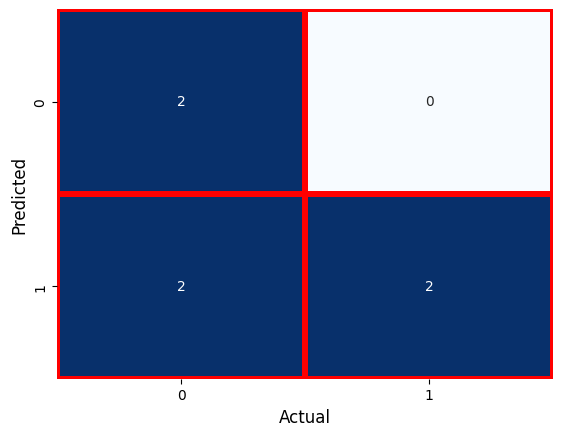

In [10]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

s=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,linewidths=3, linecolor='red')
s.set_xlabel('Actual', fontsize=12)
s.set_ylabel('Predicted', fontsize=12)

In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import precision_score
accuracy_sc=metrics.accuracy_score(y_test, y_pred)

preci=metrics.precision_score(y_test, y_pred,average=None)
f1_score=metrics.f1_score(y_test, y_pred,average=None)

print(f"Precision of test data is {preci[0]:.2f}")
print(f"Recall of test data is {preci[1]:.2f}")
print(f"F-score of test data is {f1_score[0]:.2f}")
# To creating the Confusion Matrix
con_mat=metrics.confusion_matrix(y_test, y_pred)

Precision of test data is 0.50
Recall of test data is 1.00
F-score of test data is 0.67


**Create Tree**

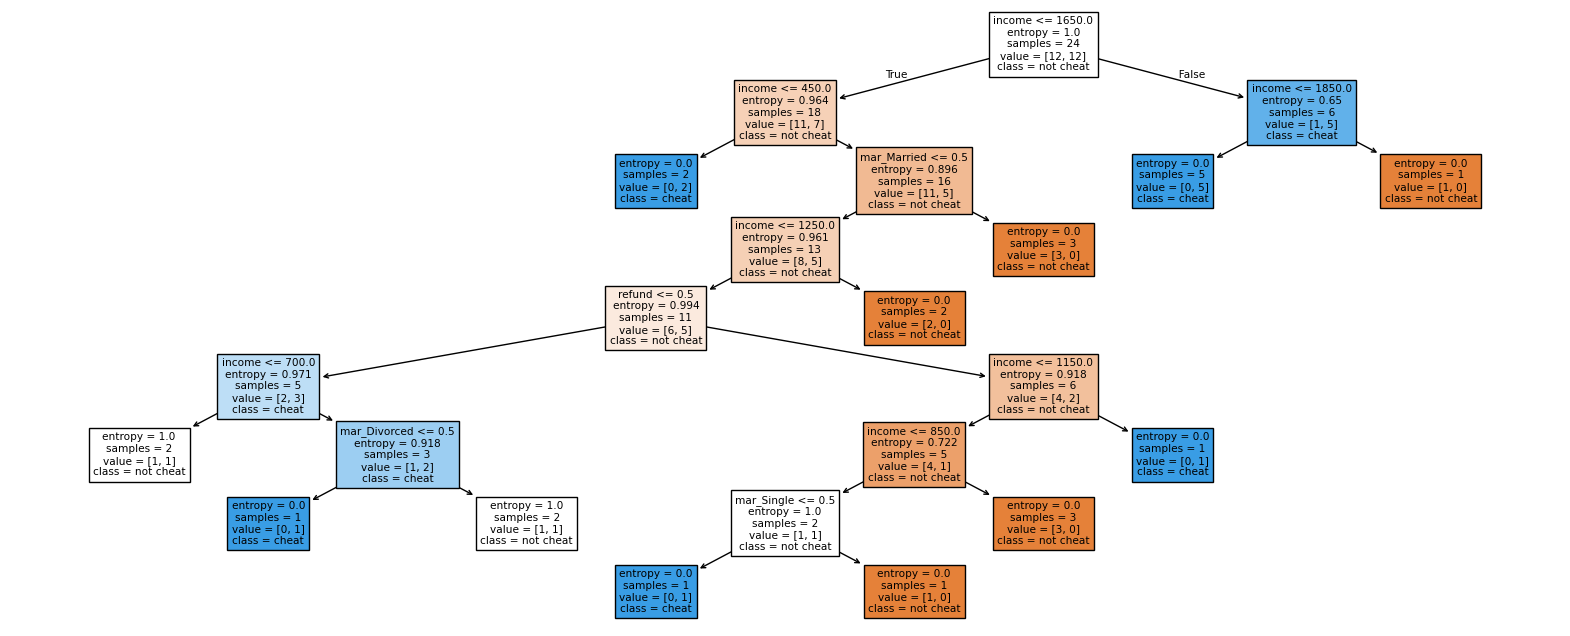

In [12]:
from matplotlib import pyplot as plt
feature_names_list=['refund','gender','income','mar_Married',	'mar_Single',	'mar_Divorced']
class_names_list = ['not cheat', 'cheat']
fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(dtree,
                   feature_names=feature_names_list,
                   class_names=class_names_list,
                   filled=True)

In [13]:
from sklearn.model_selection import learning_curve
import numpy as np
train_size, train_score, test_score = learning_curve(
    dtree, X, Y, train_sizes=np.linspace(.1,1,10)
)
test_score

array([[0.66666667, 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.66666667, 0.5       , 0.66666667, 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.33333333, 0.5       , 0.5       ],
       [0.83333333, 0.33333333, 0.33333333, 0.66666667, 0.5       ],
       [0.5       , 0.5       , 0.16666667, 0.5       , 0.5       ],
       [0.66666667, 0.5       , 0.16666667, 0.66666667, 0.5       ],
       [0.66666667, 0.5       , 0.5       , 0.83333333, 0.5       ],
       [0.66666667, 0.5       , 0.33333333, 0.83333333, 0.66666667],
       [0.66666667, 0.5       , 0.66666667, 0.83333333, 0.5       ],
       [0.83333333, 0.5       , 0.33333333, 0.66666667, 0.5       ]])

In [14]:
test_score_mean=np.mean(test_score,axis=1)
test_score_mean

array([0.53333333, 0.56666667, 0.46666667, 0.53333333, 0.43333333,
       0.5       , 0.6       , 0.6       , 0.63333333, 0.56666667])

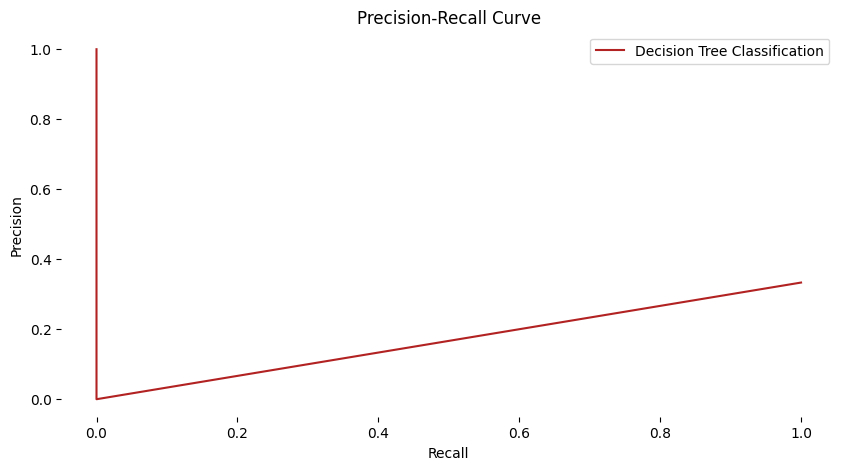

In [15]:
#Precision Curve
y_test_recode = y_test.map({'Yes': 0, 'No': 1})
y_pred_prob=dtree.predict_proba(x_test)[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test_recode,y_pred_prob)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(recall, precision, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

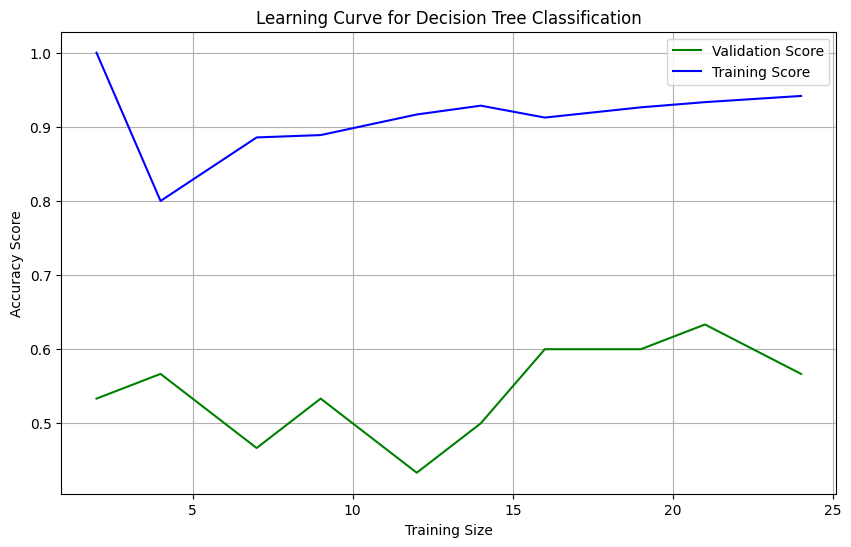

In [16]:
# Learning Curve
test_score_mean=np.mean(test_score,axis=1)
train_score_mean=np.mean(train_score,axis=1)
plt.figure(figsize=(10,6))
plt.plot(train_size,test_score_mean, label='Validation Score',color='green')
plt.plot(train_size,train_score_mean, label='Training Score',color='blue')
plt.title('Learning Curve for Decision Tree Classification')
plt.ylabel('Accuracy Score')
plt.xlabel('Training Size')
plt.legend(loc='best')
plt.grid(True)
plt.show()

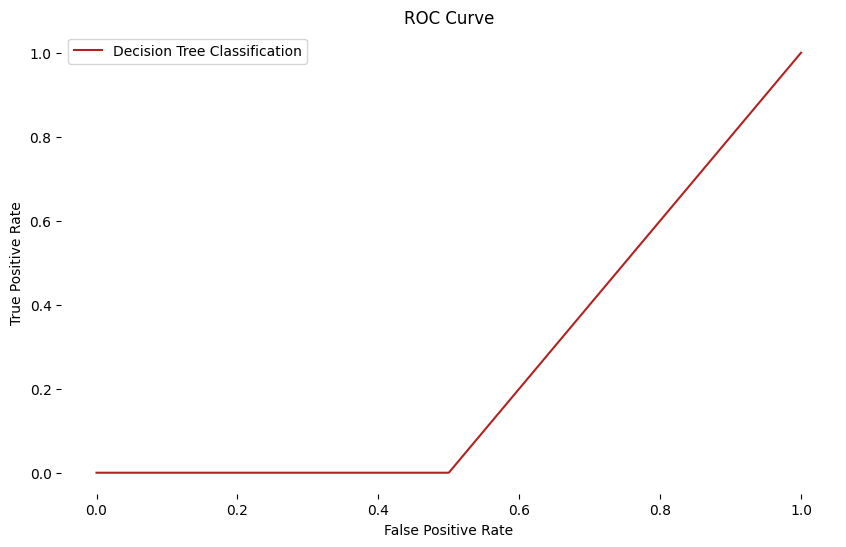

In [17]:
# ROC Curve
y_test_recode = y_test.map({'Yes': 0, 'No': 1})
y_pred_prob=dtree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_recode,  y_pred_prob)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();